In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import altair as alt
import folium

In [5]:
cd Desktop

/Users/connorheraty/Desktop


In [182]:
df = pd.read_csv('Crimes_-_2001_to_present.csv')

In [183]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2326500,HH619889,09/01/2002 11:30:14 PM,072XX S BENNETT AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,5.0,43.0,08B,1189958.0,1857438.0,2002,02/28/2018 03:56:25 PM,41.763846,-87.579317,"(41.763846222, -87.579316872)"
1,2326501,HH620552,09/02/2002 10:30:00 AM,012XX W NORTH AVE,0820,THEFT,$500 AND UNDER,OTHER,True,False,...,32.0,24.0,06,1168038.0,1910796.0,2002,02/28/2018 03:56:25 PM,41.910765,-87.658121,"(41.910764867, -87.658120918)"
2,2326505,HH622233,03/01/2002 12:00:00 AM,072XX N CLAREMONT AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,49.0,2.0,06,1159380.0,1948021.0,2002,02/28/2018 03:56:25 PM,42.013095,-87.688899,"(42.01309486, -87.688898777)"
3,2326506,HH617275,08/31/2002 02:00:00 PM,055XX N KENMORE AVE,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,SIDEWALK,False,False,...,48.0,77.0,04A,1168251.0,1936906.0,2002,02/28/2018 03:56:25 PM,41.982407,-87.656581,"(41.982407209, -87.656581101)"
4,2326509,HH616043,08/31/2002 12:01:00 AM,070XX S WENTWORTH AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,6.0,69.0,08B,1176175.0,1858397.0,2002,02/28/2018 03:56:25 PM,41.766798,-87.629805,"(41.766798264, -87.629805491)"


In [184]:
df = df.rename({'Primary Type' : 'crime_type'}, axis=1)

In [189]:
def custom_year(year):
    
    _year_df = df[df['Year'] == year]
    _year_df = _year_df.reset_index()

    time_df = _year_df['Date'].apply(lambda x: pd.Series(x.split(' ')))
    time_df = time_df.rename({0: 'MMDDYYYY', 1: 'Time', 2: 'AM/PM'}, axis=1)
    time_df = time_df.reset_index()

    _year_df = pd.merge(_year_df, time_df)
    return _year_df

In [196]:
_2010_df = df[df['Year'] == 2010]
_2010_df = _2010_df.reset_index()

time_df = _2010_df['Date'].apply(lambda x: pd.Series(x.split(' ')))
time_df = time_df.rename({0: 'MMDDYYYY', 1: 'Time', 2: 'AM/PM'}, axis=1)
time_df = time_df.reset_index()

_2010_df = pd.merge(_2010_df, time_df)

In [197]:
_2002_df = df[df['Year'] == 2002]
_2002_df = _2002_df.reset_index()

time_df = _2002_df['Date'].apply(lambda x: pd.Series(x.split(' ')))
time_df = time_df.rename({0: 'MMDDYYYY', 1: 'Time', 2: 'AM/PM'}, axis=1)
time_df = time_df.reset_index()

_2002_df = pd.merge(_2002_df, time_df)

In [223]:
_2018_df = df[df['Year'] == 2018]
_2018_df = _2018_df.reset_index()

time_df = _2018_df['Date'].apply(lambda x: pd.Series(x.split(' ')))
time_df = time_df.rename({0: 'MMDDYYYY', 1: 'Time', 2: 'AM/PM'}, axis=1)
time_df = time_df.reset_index()

_2018_df1 = pd.merge(_2018_df, time_df)

In [230]:
_2018_df = _2018_df.drop('index', axis=1)
_2018_df = _2018_df.reset_index()

_2018_df1 = pd.merge(_2018_df, time_df)

,index,ID,Case Number,Date,Block,IUCR,crime_type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,MMDDYYYY,Time,AM/PM
0,0,11192212,JB100020,01/01/2018 12:10:00 AM,028XX N NATCHEZ AVE,143B,WEAPONS VIOLATION,UNLAWFUL POSS OTHER FIREARM,ALLEY,False,...,1132592.0,1918227.0,2018,05/04/2018 03:51:04 PM,41.931848,-87.788165,"(41.931848306, -87.78816484)",01/01/2018,12:10:00,AM
1,1,11195026,JB100563,01/01/2018 12:00:00 PM,057XX N MANTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1137640.0,1938190.0,2018,05/04/2018 03:51:04 PM,41.986539,-87.769131,"(41.986539089, -87.769130877)",01/01/2018,12:00:00,PM
2,2,11197453,JB102096,01/01/2018 04:00:00 AM,061XX S WOODLAWN AVE,0498,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET S...,APARTMENT,False,...,1185269.0,1864623.0,2018,05/04/2018 03:51:04 PM,41.783674,-87.596277,"(41.783674009, -87.596277178)",01/01/2018,04:00:00,AM
3,3,23757,JB100159,01/01/2018 02:46:00 AM,039XX W CORNELIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,...,1149289.0,1922972.0,2018,03/18/2019 04:08:09 PM,41.944561,-87.726682,"(41.944561251, -87.726681812)",01/01/2018,02:46:00,AM
4,4,23758,JB100522,01/01/2018 11:33:00 AM,026XX N HAMPDEN CT,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,...,1172664.0,1917743.0,2018,03/18/2019 04:08:09 PM,41.929727,-87.640921,"(41.929726567, -87.64092074)",01/01/2018,11:33:00,AM


In [236]:
_2018_df.describe()

,index,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,266372.00000,2.663720e+05,266372.000000,266372.000000,266369.000000,266370.000000,2.635410e+05,2.635410e+05,266372.0,263541.000000,263541.000000
mean,133185.50000,1.135131e+07,1142.279478,11.194367,23.439199,36.469903,1.165009e+06,1.886592e+06,2018.0,41.844396,-87.669977
std,76895.11729,5.370271e+05,696.085330,6.952862,14.094014,21.453993,1.603603e+04,3.118452e+04,0.0,0.085755,0.058385
min,0.00000,2.375700e+04,111.000000,1.000000,1.000000,0.000000,1.092706e+06,1.813897e+06,2018.0,41.644590,-87.934273
25%,66592.75000,1.128628e+07,611.000000,6.000000,10.000000,23.000000,1.153337e+06,1.859421e+06,2018.0,41.769662,-87.712382
50%,133185.50000,1.137540e+07,1031.000000,10.000000,24.000000,32.000000,1.166911e+06,1.894243e+06,2018.0,41.865575,-87.663281
75%,199778.25000,1.146454e+07,1723.000000,17.000000,35.000000,53.000000,1.176461e+06,1.908735e+06,2018.0,41.905324,-87.627842
max,266371.00000,1.165429e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.0,42.022671,-87.524529


In [217]:
_2010_df.reset_index()

,level_0,index,ID,Case Number,Date,Block,IUCR,crime_type,Description,Location Description,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,MMDDYYYY,Time,AM/PM
0,0,19654,10037171,HY226628,10/12/2010 12:00:00 AM,021XX W 18TH PL,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,...,1162462.0,1891055.0,2010,02/10/2018 03:50:01 PM,41.856713,-87.679158,"(41.856712517, -87.679157906)",11/27/2010,07:30:00,AM
1,1,108762,10555373,HZ301810,10/10/2010 10:00:00 AM,094XX S ST LAWRENCE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,...,NaN,NaN,2010,06/11/2016 03:53:19 PM,NaN,NaN,NaN,03/18/2010,11:00:00,PM
2,2,110512,10557403,HZ304605,06/12/2010 09:00:00 AM,114XX S WALLACE ST,0820,THEFT,$500 AND UNDER,RESIDENCE,...,NaN,NaN,2010,06/13/2016 03:54:00 PM,NaN,NaN,NaN,03/25/2010,08:30:00,AM
3,3,112103,10560372,HZ307485,01/01/2010 12:01:00 AM,061XX S SACRAMENTO AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,...,NaN,NaN,2010,06/15/2016 03:55:08 PM,NaN,NaN,NaN,03/26/2010,02:07:00,PM
4,4,115890,10565683,HZ312979,01/01/2010 09:00:00 AM,061XX S RHODES AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,...,NaN,NaN,2010,06/20/2016 03:53:27 PM,NaN,NaN,NaN,03/30/2010,03:45:00,PM
5,5,116986,10567636,HZ315402,05/17/2010 09:00:00 AM,017XX N KEELER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,...,NaN,NaN,2010,06/21/2016 03:56:51 PM,NaN,NaN,NaN,03/31/2010,02:00:00,PM
6,6,117522,19432,HS346379,06/06/2010 10:39:00 PM,079XX S BRANDON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,...,1198863.0,1852888.0,2010,03/19/2019 04:11:22 PM,41.751142,-87.546831,"(41.751141883, -87.54683123)",04/01/2010,06:40:00,AM
7,7,122632,10574587,HZ322698,01/01/2010 12:01:00 AM,063XX S MOZART ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,...,NaN,NaN,2010,06/26/2016 03:52:13 PM,NaN,NaN,NaN,04/03/2010,10:20:57,PM
8,8,123626,10543973,HZ289654,02/15/2010 12:01:00 AM,028XX S DRAKE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,...,NaN,NaN,2010,06/29/2016 03:52:46 PM,NaN,NaN,NaN,04/06/2010,01:00:00,PM
9,9,124309,10577917,HZ325451,01/01/2010 12:00:00 AM,019XX W FARGO AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,...,NaN,NaN,2010,06/29/2016 03:52:46 PM,NaN,NaN,NaN,04/07/2010,07:30:00,AM


In [239]:
_2018_group = (_2018_df1
             .groupby('crime_type')
             .crime_type.agg(['count'])
             .rename({'crime_type':'Crime'}, axis=1))

_2018_group = pd.DataFrame(_2018_group)
_2018_crime_type = _2018_group.reset_index()

_2018_crime_type = _2018_crime_type.sort_values('count', ascending=False)

_2018_crime_type

,crime_type,count
30,THEFT,65087
2,BATTERY,49783
6,CRIMINAL DAMAGE,27807
1,ASSAULT,20378
8,DECEPTIVE PRACTICE,18770
23,OTHER OFFENSE,17138
17,NARCOTICS,13018
3,BURGLARY,11734
16,MOTOR VEHICLE THEFT,9988
27,ROBBERY,9682


In [238]:
_2010_group = (_2010_df
             .groupby('crime_type')
             .crime_type.agg(['count'])
             .rename({'crime_type':'Crime'}, axis=1))

_2010_group = pd.DataFrame(_2010_group)
_2010_crime_type = _2010_group.reset_index()

_2010_crime_type = _2010_crime_type.sort_values('count', ascending=False)
#_2018_crime_type = _2018_crime_type.drop(index = [19, 11, 18, 4])
_2010_crime_type

,crime_type,count
3,DECEPTIVE PRACTICE,58
1,CRIM SEXUAL ASSAULT,11
6,OFFENSE INVOLVING CHILDREN,11
7,OTHER OFFENSE,5
9,THEFT,3
4,HOMICIDE,2
0,BATTERY,1
2,CRIMINAL DAMAGE,1
5,MOTOR VEHICLE THEFT,1
8,SEX OFFENSE,1


In [ ]:
_2002_group = (_2002_df
             .groupby('crime_type')
             .crime_type.agg(['count'])
             .rename({'crime_type':'Crime'}, axis=1))

_2002_group = pd.DataFrame(_2002_group)
_2002_crime_type = _2002_group.reset_index()

_2002_crime_type = _2002_crime_type.sort_values('count', ascending=False)
_2002_crime_type = _2002_crime_type.drop(index = 23)

In [ ]:
df_test = pd.merge(_2018_crime_type, _2002_crime_type, on = 'crime_type')
df_test = df_test.rename({'count_x' : '2018', 'count_y' : '2002'}, axis=1)
df_test['total'] = df_test['2018'] + df_test['2002']
df_test = df_test.sort_values('total', ascending=False)

graph_df = df_test.head(10)

In [ ]:
graph_df

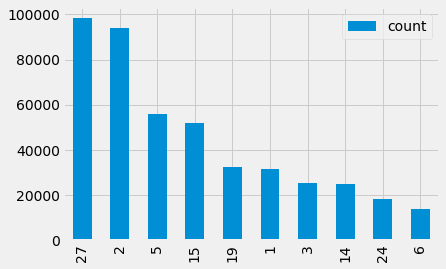

In [124]:
_2002_crime_top10.plot(kind='bar');

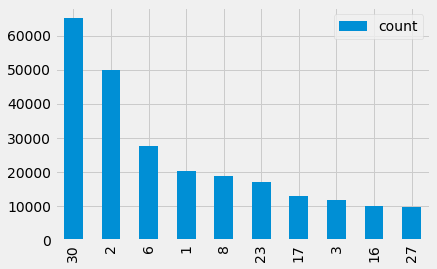

In [125]:
_2018_crime_top10.plot(kind='bar');

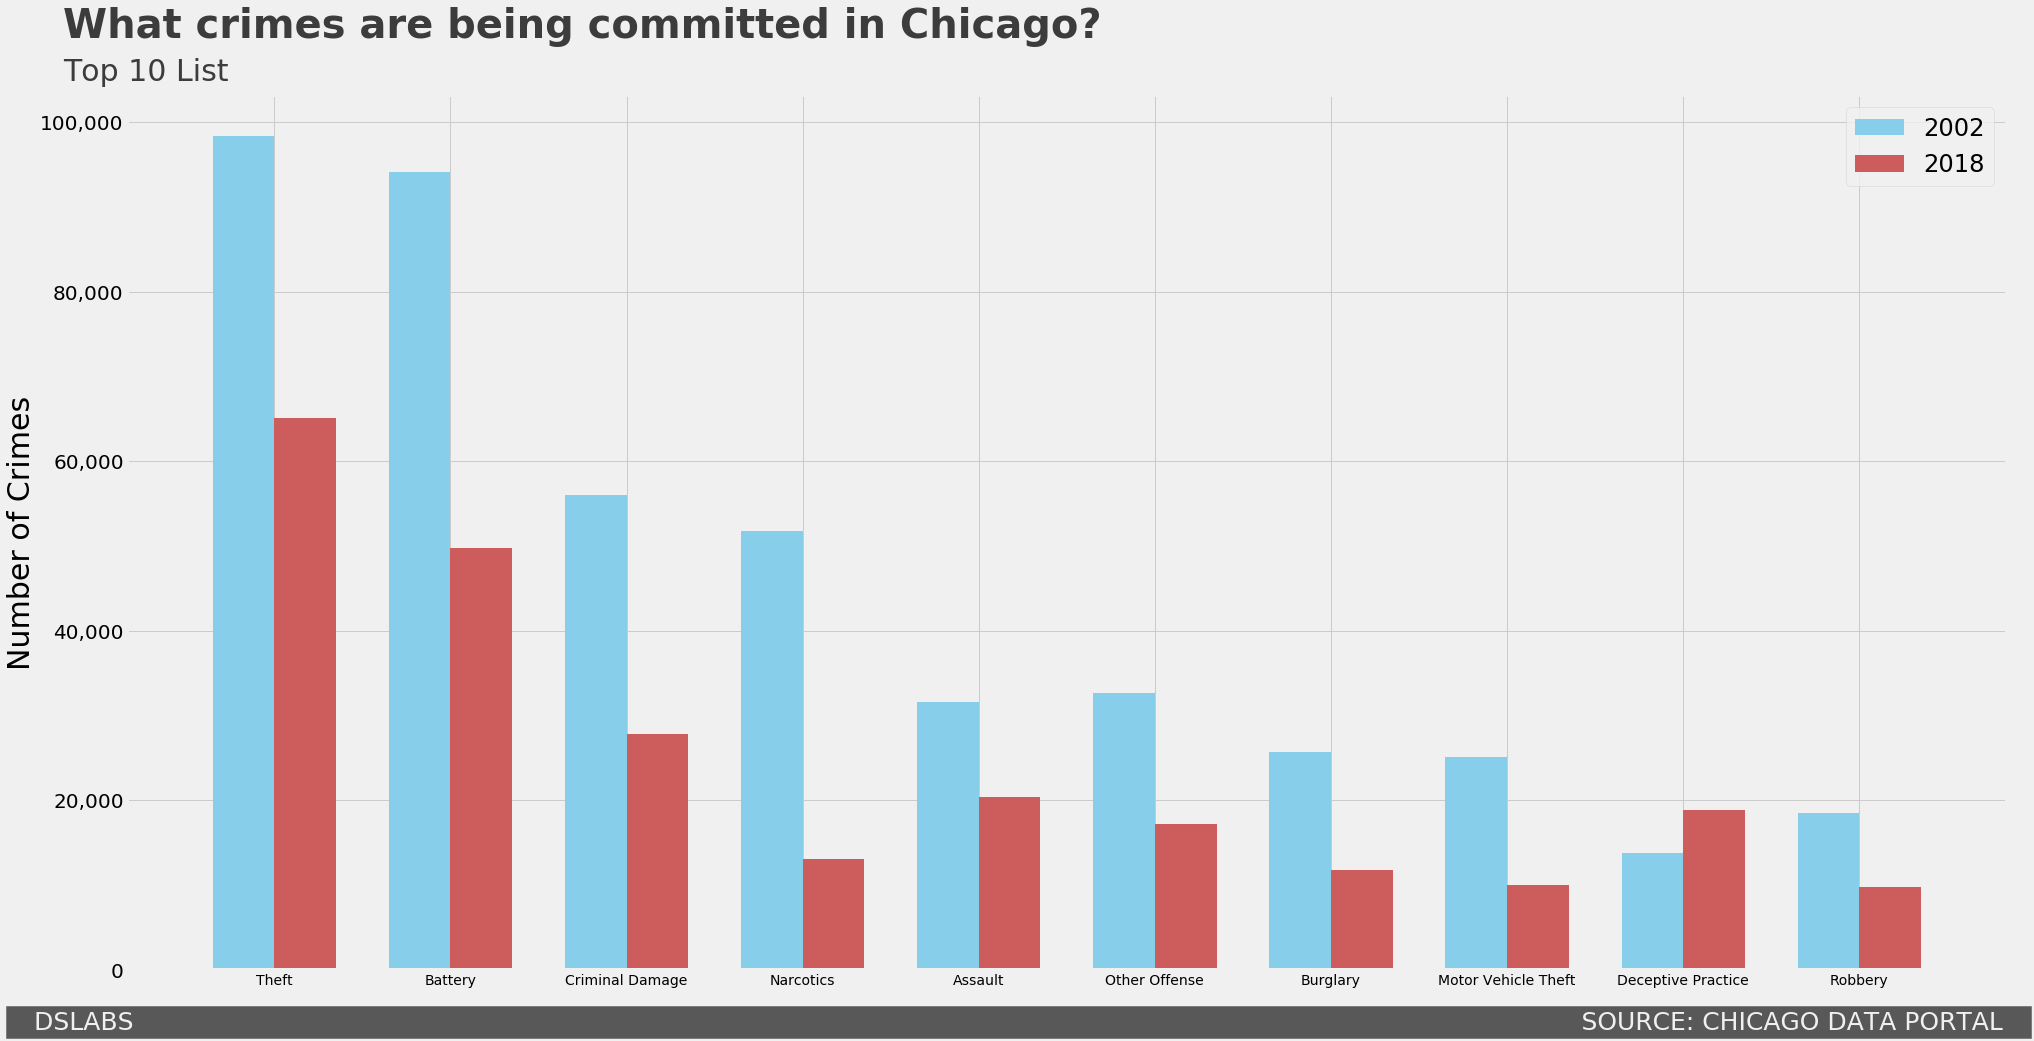

In [180]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,15))


n_groups = 10
index = np.arange(n_groups)
width = .35

rects1 = ax.bar(index-width/2, graph_df['2002'], width,
               color='SkyBlue', label='2002')
rects2 = ax.bar(index+width/2, graph_df['2018'], width,
               color='IndianRed', label='2018')


ax.set_ylabel('Number of Crimes', fontsize=30)
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])
ax.set_yticklabels(['0', '20,000','40,000', '60,000', '80,000', '100,000'],
                   fontsize=20)

ax.set_xticks(index)
ax.set_xticklabels(['Theft', 'Battery', 'Criminal Damage', 'Narcotics', 'Assault',
                    'Other Offense', 'Burglary', 'Motor Vehicle Theft', 'Deceptive Practice', 'Robbery'])

ax.legend(fontsize='xx-large')

ax.text(x = -1.2, y = 110000,
    s ="What crimes are being committed in Chicago?",
    fontsize = 40, weight = 'bold', alpha=.75)

ax.text(x = -1.2, y = 105000,
    s ="Top 10 List",
    fontsize = 30, alpha=.75)



#Add informational bar at bottom of graph
ax.text(x = -1.5, y = -7000, 
    s = '   DSLABS                                                                                                                                                                                     SOURCE: CHICAGO DATA PORTAL   ',
    fontsize = 25, color = '#f0f0f0', backgroundcolor = '#585859')

plt.show()